In [1]:
import os
from stable_baselines3 import DQN
import gymnasium as gym
import gym
import shimmy
import numpy as np
import matplotlib.pyplot as plt
from viper_3d import *
from sklearn import tree

%matplotlib inline

In [2]:
algo_dt = tree.DecisionTreeClassifier
algo_rl = DQN
iter_viper = 10
nb_data_from_nn_policy = 1_000

mdp = gym.make('Acrobot-v1')

In [3]:
list_number_of_nodes, list_list_scores = Viper(mdp, algo_dt, algo_rl, iter_viper, nb_data_from_nn_policy, 'cumulative', path_to_expert='policies/Acrobot-v1.zip')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\Medeng Matthieu\anaconda3\envs\cv\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
c:\Users\Medeng Matthieu\anaconda3\envs\cv\Lib\site-packages\stable_baselines3\common\save_util.py:166: UserWarning: Could not deserialize object learning_rate. Consider using `custom_objects` argument to replace this object.
Exception: code expected at least 16 arguments, got 15
  warnings.warn(
c:\Users\Medeng Matthieu\anaconda3\envs\cv\Lib\site-packages\stable_baselines3\common\save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at least 16 arguments, got 15
  warnings.warn(
c:\Users\Medeng Matthieu\anaconda3\e

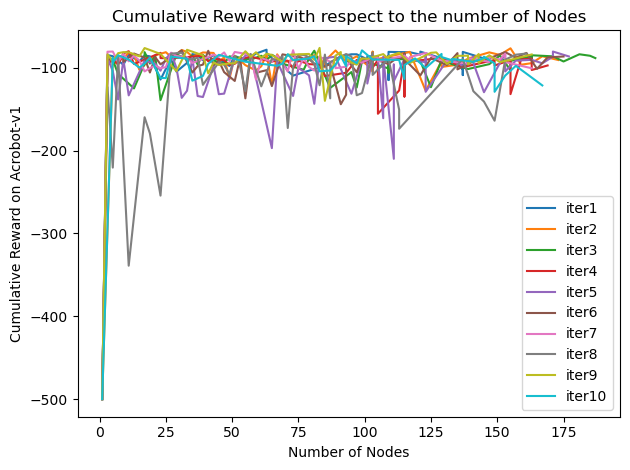

In [4]:
for i in range(iter_viper):
    plt.plot(list_number_of_nodes[i], list_list_scores[i], label='iter' + str(i+1))

plt.legend()
plt.xlabel('Number of Nodes')
plt.ylabel('Cumulative Reward on Acrobot-v1')
plt.title('Cumulative Reward with respect to the number of Nodes')
plt.tight_layout()
plt.savefig('figures/plot_2d_iter_nodes_rewards_10_1000.png')

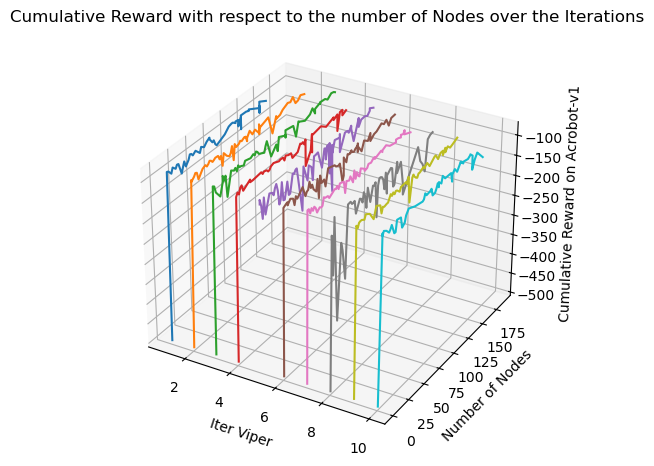

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(iter_viper):
    ax.plot([i+1]*len(list_number_of_nodes[i]), list_number_of_nodes[i], list_list_scores[i])

ax.set_xlabel('Iter Viper')
ax.set_ylabel('Number of Nodes')
ax.set_zlabel('Cumulative Reward on Acrobot-v1')

plt.title('Cumulative Reward with respect to the number of Nodes over the Iterations')
plt.draw()
plt.tight_layout()
plt.savefig('figures/plot_3d_iter_nodes_rewards_10_1000.png')